In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
from datetime import datetime
from datetime import timedelta

In [2]:
sheet_name='dsahboard'
sheet_id = '18e2A5cpq2wSXladfDhhlX1zaXR-FU5vYharZ54W__9k'

url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

data = pd.read_csv(url)
data.head()

,Kode Pelatihan,Nama Pelatihan (digabung jika lebih dari 1 kelas),Angkatan,Unit Penyelenggara,Jumlah Kelas,Tanggal Mulai,BUlan,Tanggal Selesai,PIC,Rencana Kalpem,...,Laki-laki (rencana),Perempuan (rencana),Tidak ada JK (rencana),Laki-laki (apply/mengikuti),Perempuan (apply/mengikuti),Tidak ada JK (apply/mengikuti),Laki-laki (Lulus),Perempuan (Lulus),Tidak ada JK (Lulus),A
0,1,Training of Facilitator Program Standardisasi ...,1,Pusdiklat AP,2,22-Jan,January,1-Feb,Ibnu dkk,0.0,...,0,0,57,0,0,57,0,0,56,0
1,2,Pelatihan Persiapan Uji Kompetensi Pengadaan B...,1,Pusdiklat AP,1,22-Jan,January,25-Jan,Iqbal,0.0,...,0,0,31,0,0,31,0,0,31,0
2,3,Pelatihan Jarak Jauh Bendahara Pengeluaran/Ben...,1,Pusdiklat AP,6,29-Jan,January,2-Feb,Intania dkk,151.0,...,0,0,355,0,0,339,0,0,328,0
3,4,Pelatihan Analisis Dampak Treasury terhadap Se...,1,Pusdiklat AP,1,29-Jan,January,2-Feb,Ibnu,0.0,...,0,0,34,0,0,34,0,0,34,0
4,5,Pelatihan Pengadaan Barang/Jasa Pemerintah: Pe...,1,Pusdiklat AP,1,29-Jan,January,1-Feb,Aghi,0.0,...,0,0,16,0,0,16,0,0,16,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 43 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Kode Pelatihan                                     203 non-null    int64  
 1   Nama Pelatihan (digabung jika lebih dari 1 kelas)  203 non-null    object 
 2   Angkatan                                           203 non-null    int64  
 3   Unit Penyelenggara                                 203 non-null    object 
 4   Jumlah Kelas                                       203 non-null    int64  
 5   Tanggal Mulai                                      203 non-null    object 
 6   BUlan                                              203 non-null    object 
 7   Tanggal Selesai                                    203 non-null    object 
 8   PIC                                                109 non-null    object 
 9   Rencana Ka

In [4]:
splitdata = data['Tanggal Mulai'].str.split("-", n=1, expand = True)

In [5]:
data['tanggalmulai']= splitdata[0]
data['bulanmulai'] = splitdata[1]
data.head()

,Kode Pelatihan,Nama Pelatihan (digabung jika lebih dari 1 kelas),Angkatan,Unit Penyelenggara,Jumlah Kelas,Tanggal Mulai,BUlan,Tanggal Selesai,PIC,Rencana Kalpem,...,Tidak ada JK (rencana),Laki-laki (apply/mengikuti),Perempuan (apply/mengikuti),Tidak ada JK (apply/mengikuti),Laki-laki (Lulus),Perempuan (Lulus),Tidak ada JK (Lulus),A,tanggalmulai,bulanmulai
0,1,Training of Facilitator Program Standardisasi ...,1,Pusdiklat AP,2,22-Jan,January,1-Feb,Ibnu dkk,0.0,...,57,0,0,57,0,0,56,0,22,Jan
1,2,Pelatihan Persiapan Uji Kompetensi Pengadaan B...,1,Pusdiklat AP,1,22-Jan,January,25-Jan,Iqbal,0.0,...,31,0,0,31,0,0,31,0,22,Jan
2,3,Pelatihan Jarak Jauh Bendahara Pengeluaran/Ben...,1,Pusdiklat AP,6,29-Jan,January,2-Feb,Intania dkk,151.0,...,355,0,0,339,0,0,328,0,29,Jan
3,4,Pelatihan Analisis Dampak Treasury terhadap Se...,1,Pusdiklat AP,1,29-Jan,January,2-Feb,Ibnu,0.0,...,34,0,0,34,0,0,34,0,29,Jan
4,5,Pelatihan Pengadaan Barang/Jasa Pemerintah: Pe...,1,Pusdiklat AP,1,29-Jan,January,1-Feb,Aghi,0.0,...,16,0,0,16,0,0,16,0,29,Jan


In [6]:
#gabung per bulan, dan bandingkan antara rencana dan realisasi
data_perbulan = data.groupby(['bulanmulai']).agg({'Rencana Kalpem' : 'sum', 'Peserta mengikuti/apply' : 'sum'})
print(data_perbulan)

            Rencana Kalpem  Peserta mengikuti/apply
bulanmulai                                         
Apr                 1400.0                     1440
Feb                 1652.0                     2158
Jan                  351.0                      713
Jun                 1905.0                      406
Mar                 1931.0                     2972
May                 3366.0                     2218


<function matplotlib.pyplot.show(close=None, block=None)>

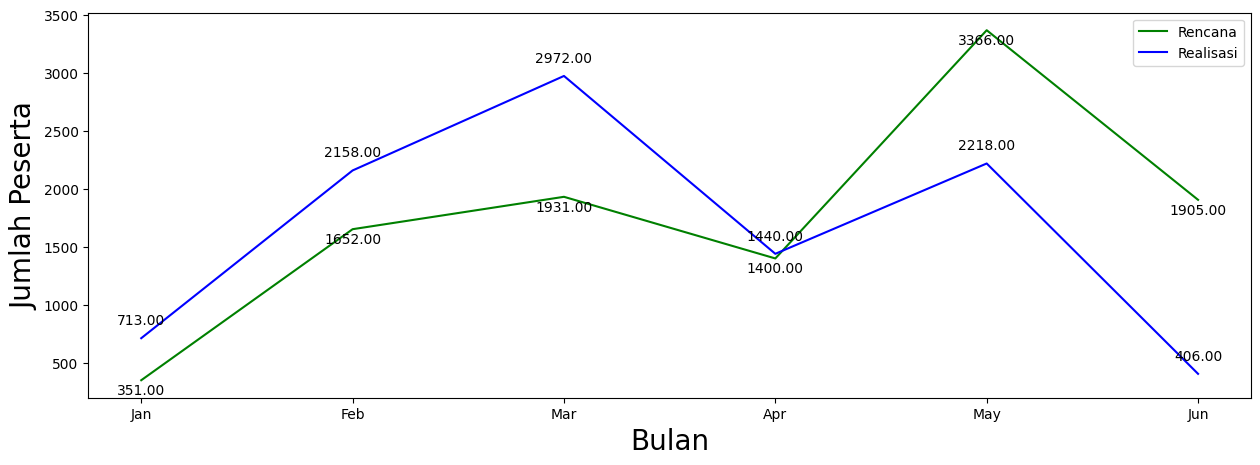

In [7]:
#buat grafik dari data per bulan
data_perbulan1 = data.pivot_table(['Rencana Kalpem', 'Peserta mengikuti/apply'], 'bulanmulai', aggfunc='sum').reset_index()
data_perbulan1['bulanmulai'] = pd.Categorical(data_perbulan1['bulanmulai'], ["Jan", "Feb", "Mar", "Apr", "May", "Jun"])
data_perbulan_short = data_perbulan1.sort_values("bulanmulai")
data_perbulan_short
plt.figure(figsize=(15,5))
plt.plot(data_perbulan_short['bulanmulai'], data_perbulan_short['Rencana Kalpem'], label = 'Rencana', color = 'green')
plt.plot(data_perbulan_short['bulanmulai'], data_perbulan_short['Peserta mengikuti/apply'], label = 'Realisasi', color = 'blue')
plt.xlabel('Bulan',size= 20)
plt.ylabel('Jumlah Peserta', size = 20)
#buat label supaya ada keterangannya di atas garis
for x,y in zip (data_perbulan_short['bulanmulai'], data_perbulan_short['Rencana Kalpem']):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-10), # distance from text to points (x,y)
                 ha='center')    
for x,y in zip (data_perbulan_short['bulanmulai'], data_perbulan_short['Peserta mengikuti/apply']):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')  
plt.legend()
plt.show

In [8]:
#get list unit tanpa duplicate
unit = data['Unit Penyelenggara'].drop_duplicates().astype('str')
unit

0       Pusdiklat AP
5         BDK Cimahi
6     BDK Yogyakarta
7      BDK Pontianak
8       BDK Makassar
17         BDK Medan
19        BDK Malang
20      BDK Denpasar
21        BDK Manado
24     BDK Pekanbaru
25     BDK Palembang
27    BDK Balikpapan
Name: Unit Penyelenggara, dtype: object

In [9]:
splitdataselesai = data['Tanggal Selesai'].str.split("-", n=1, expand = True)

In [10]:
data['tanggalselesai']= splitdataselesai[0]
data['bulanselesai'] = splitdataselesai[1]
data.head()


,Kode Pelatihan,Nama Pelatihan (digabung jika lebih dari 1 kelas),Angkatan,Unit Penyelenggara,Jumlah Kelas,Tanggal Mulai,BUlan,Tanggal Selesai,PIC,Rencana Kalpem,...,Perempuan (apply/mengikuti),Tidak ada JK (apply/mengikuti),Laki-laki (Lulus),Perempuan (Lulus),Tidak ada JK (Lulus),A,tanggalmulai,bulanmulai,tanggalselesai,bulanselesai
0,1,Training of Facilitator Program Standardisasi ...,1,Pusdiklat AP,2,22-Jan,January,1-Feb,Ibnu dkk,0.0,...,0,57,0,0,56,0,22,Jan,1,Feb
1,2,Pelatihan Persiapan Uji Kompetensi Pengadaan B...,1,Pusdiklat AP,1,22-Jan,January,25-Jan,Iqbal,0.0,...,0,31,0,0,31,0,22,Jan,25,Jan
2,3,Pelatihan Jarak Jauh Bendahara Pengeluaran/Ben...,1,Pusdiklat AP,6,29-Jan,January,2-Feb,Intania dkk,151.0,...,0,339,0,0,328,0,29,Jan,2,Feb
3,4,Pelatihan Analisis Dampak Treasury terhadap Se...,1,Pusdiklat AP,1,29-Jan,January,2-Feb,Ibnu,0.0,...,0,34,0,0,34,0,29,Jan,2,Feb
4,5,Pelatihan Pengadaan Barang/Jasa Pemerintah: Pe...,1,Pusdiklat AP,1,29-Jan,January,1-Feb,Aghi,0.0,...,0,16,0,0,16,0,29,Jan,1,Feb


In [11]:
dataDenganTahun = data.assign(Tahun=2024)

In [12]:
dataDenganTahun.head()

,Kode Pelatihan,Nama Pelatihan (digabung jika lebih dari 1 kelas),Angkatan,Unit Penyelenggara,Jumlah Kelas,Tanggal Mulai,BUlan,Tanggal Selesai,PIC,Rencana Kalpem,...,Tidak ada JK (apply/mengikuti),Laki-laki (Lulus),Perempuan (Lulus),Tidak ada JK (Lulus),A,tanggalmulai,bulanmulai,tanggalselesai,bulanselesai,Tahun
0,1,Training of Facilitator Program Standardisasi ...,1,Pusdiklat AP,2,22-Jan,January,1-Feb,Ibnu dkk,0.0,...,57,0,0,56,0,22,Jan,1,Feb,2024
1,2,Pelatihan Persiapan Uji Kompetensi Pengadaan B...,1,Pusdiklat AP,1,22-Jan,January,25-Jan,Iqbal,0.0,...,31,0,0,31,0,22,Jan,25,Jan,2024
2,3,Pelatihan Jarak Jauh Bendahara Pengeluaran/Ben...,1,Pusdiklat AP,6,29-Jan,January,2-Feb,Intania dkk,151.0,...,339,0,0,328,0,29,Jan,2,Feb,2024
3,4,Pelatihan Analisis Dampak Treasury terhadap Se...,1,Pusdiklat AP,1,29-Jan,January,2-Feb,Ibnu,0.0,...,34,0,0,34,0,29,Jan,2,Feb,2024
4,5,Pelatihan Pengadaan Barang/Jasa Pemerintah: Pe...,1,Pusdiklat AP,1,29-Jan,January,1-Feb,Aghi,0.0,...,16,0,0,16,0,29,Jan,1,Feb,2024


In [13]:
#replace bulan dengan angka
dataDenganTahun.loc[dataDenganTahun.bulanselesai == 'Feb', 'bulanselesai'] = 2
dataDenganTahun.loc[dataDenganTahun.bulanselesai == 'Jan', 'bulanselesai'] = 1
dataDenganTahun.loc[dataDenganTahun.bulanselesai == 'Mar', 'bulanselesai'] = 3
dataDenganTahun.loc[dataDenganTahun.bulanselesai == 'Apr', 'bulanselesai'] = 4
dataDenganTahun.loc[dataDenganTahun.bulanselesai == 'May', 'bulanselesai'] = 5
dataDenganTahun.loc[dataDenganTahun.bulanselesai == 'Jun', 'bulanselesai'] = 6
dataDenganTahun.loc[dataDenganTahun.bulanselesai == 'Jul', 'bulanselesai'] = 7
dataDenganTahun.loc[dataDenganTahun.bulanmulai == 'Feb', 'bulanmulai'] = 2
dataDenganTahun.loc[dataDenganTahun.bulanmulai == 'Jan', 'bulanmulai'] = 1
dataDenganTahun.loc[dataDenganTahun.bulanmulai == 'Mar', 'bulanmulai'] = 3
dataDenganTahun.loc[dataDenganTahun.bulanmulai == 'Apr', 'bulanmulai'] = 4
dataDenganTahun.loc[dataDenganTahun.bulanmulai == 'May', 'bulanmulai'] = 5
dataDenganTahun.loc[dataDenganTahun.bulanmulai == 'Jun', 'bulanmulai'] = 6
dataDenganTahun.loc[dataDenganTahun.bulanmulai == 'Jul', 'bulanmulai'] = 7

In [14]:
dataDenganTahun.head()

,Kode Pelatihan,Nama Pelatihan (digabung jika lebih dari 1 kelas),Angkatan,Unit Penyelenggara,Jumlah Kelas,Tanggal Mulai,BUlan,Tanggal Selesai,PIC,Rencana Kalpem,...,Tidak ada JK (apply/mengikuti),Laki-laki (Lulus),Perempuan (Lulus),Tidak ada JK (Lulus),A,tanggalmulai,bulanmulai,tanggalselesai,bulanselesai,Tahun
0,1,Training of Facilitator Program Standardisasi ...,1,Pusdiklat AP,2,22-Jan,January,1-Feb,Ibnu dkk,0.0,...,57,0,0,56,0,22,1,1,2,2024
1,2,Pelatihan Persiapan Uji Kompetensi Pengadaan B...,1,Pusdiklat AP,1,22-Jan,January,25-Jan,Iqbal,0.0,...,31,0,0,31,0,22,1,25,1,2024
2,3,Pelatihan Jarak Jauh Bendahara Pengeluaran/Ben...,1,Pusdiklat AP,6,29-Jan,January,2-Feb,Intania dkk,151.0,...,339,0,0,328,0,29,1,2,2,2024
3,4,Pelatihan Analisis Dampak Treasury terhadap Se...,1,Pusdiklat AP,1,29-Jan,January,2-Feb,Ibnu,0.0,...,34,0,0,34,0,29,1,2,2,2024
4,5,Pelatihan Pengadaan Barang/Jasa Pemerintah: Pe...,1,Pusdiklat AP,1,29-Jan,January,1-Feb,Aghi,0.0,...,16,0,0,16,0,29,1,1,2,2024


In [15]:
dataDenganTahun['selesai']=dataDenganTahun['Tahun'].astype(str)+'-'+dataDenganTahun['bulanselesai'].astype(str)+'-'+dataDenganTahun['tanggalselesai'].astype(str)

In [16]:
dataDenganTahun.head()

,Kode Pelatihan,Nama Pelatihan (digabung jika lebih dari 1 kelas),Angkatan,Unit Penyelenggara,Jumlah Kelas,Tanggal Mulai,BUlan,Tanggal Selesai,PIC,Rencana Kalpem,...,Laki-laki (Lulus),Perempuan (Lulus),Tidak ada JK (Lulus),A,tanggalmulai,bulanmulai,tanggalselesai,bulanselesai,Tahun,selesai
0,1,Training of Facilitator Program Standardisasi ...,1,Pusdiklat AP,2,22-Jan,January,1-Feb,Ibnu dkk,0.0,...,0,0,56,0,22,1,1,2,2024,2024-2-1
1,2,Pelatihan Persiapan Uji Kompetensi Pengadaan B...,1,Pusdiklat AP,1,22-Jan,January,25-Jan,Iqbal,0.0,...,0,0,31,0,22,1,25,1,2024,2024-1-25
2,3,Pelatihan Jarak Jauh Bendahara Pengeluaran/Ben...,1,Pusdiklat AP,6,29-Jan,January,2-Feb,Intania dkk,151.0,...,0,0,328,0,29,1,2,2,2024,2024-2-2
3,4,Pelatihan Analisis Dampak Treasury terhadap Se...,1,Pusdiklat AP,1,29-Jan,January,2-Feb,Ibnu,0.0,...,0,0,34,0,29,1,2,2,2024,2024-2-2
4,5,Pelatihan Pengadaan Barang/Jasa Pemerintah: Pe...,1,Pusdiklat AP,1,29-Jan,January,1-Feb,Aghi,0.0,...,0,0,16,0,29,1,1,2,2024,2024-2-1


In [17]:
dataDenganTahun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 49 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Kode Pelatihan                                     203 non-null    int64  
 1   Nama Pelatihan (digabung jika lebih dari 1 kelas)  203 non-null    object 
 2   Angkatan                                           203 non-null    int64  
 3   Unit Penyelenggara                                 203 non-null    object 
 4   Jumlah Kelas                                       203 non-null    int64  
 5   Tanggal Mulai                                      203 non-null    object 
 6   BUlan                                              203 non-null    object 
 7   Tanggal Selesai                                    203 non-null    object 
 8   PIC                                                109 non-null    object 
 9   Rencana Ka

In [18]:
#ubah jadi tanggal formatnya
dataDenganTahun['selesai2']=dataDenganTahun['selesai'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [19]:
dataDenganTahun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 50 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Kode Pelatihan                                     203 non-null    int64         
 1   Nama Pelatihan (digabung jika lebih dari 1 kelas)  203 non-null    object        
 2   Angkatan                                           203 non-null    int64         
 3   Unit Penyelenggara                                 203 non-null    object        
 4   Jumlah Kelas                                       203 non-null    int64         
 5   Tanggal Mulai                                      203 non-null    object        
 6   BUlan                                              203 non-null    object        
 7   Tanggal Selesai                                    203 non-null    object        
 8   PIC                 

In [20]:
#hapus kolom (kalau row, axis = 0)
dataDenganTahun = dataDenganTahun.drop('selesai', axis=1)

In [21]:
dataDenganTahun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 49 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Kode Pelatihan                                     203 non-null    int64         
 1   Nama Pelatihan (digabung jika lebih dari 1 kelas)  203 non-null    object        
 2   Angkatan                                           203 non-null    int64         
 3   Unit Penyelenggara                                 203 non-null    object        
 4   Jumlah Kelas                                       203 non-null    int64         
 5   Tanggal Mulai                                      203 non-null    object        
 6   BUlan                                              203 non-null    object        
 7   Tanggal Selesai                                    203 non-null    object        
 8   PIC                 

In [22]:
#rename column
dataDenganTahun = dataDenganTahun.rename(columns={'selesai2' : 'selesai'})

In [23]:
dataDenganTahun.head(10)

,Kode Pelatihan,Nama Pelatihan (digabung jika lebih dari 1 kelas),Angkatan,Unit Penyelenggara,Jumlah Kelas,Tanggal Mulai,BUlan,Tanggal Selesai,PIC,Rencana Kalpem,...,Laki-laki (Lulus),Perempuan (Lulus),Tidak ada JK (Lulus),A,tanggalmulai,bulanmulai,tanggalselesai,bulanselesai,Tahun,selesai
0,1,Training of Facilitator Program Standardisasi ...,1,Pusdiklat AP,2,22-Jan,January,1-Feb,Ibnu dkk,0.0,...,0,0,56,0,22,1,1,2,2024,2024-02-01
1,2,Pelatihan Persiapan Uji Kompetensi Pengadaan B...,1,Pusdiklat AP,1,22-Jan,January,25-Jan,Iqbal,0.0,...,0,0,31,0,22,1,25,1,2024,2024-01-25
2,3,Pelatihan Jarak Jauh Bendahara Pengeluaran/Ben...,1,Pusdiklat AP,6,29-Jan,January,2-Feb,Intania dkk,151.0,...,0,0,328,0,29,1,2,2,2024,2024-02-02
3,4,Pelatihan Analisis Dampak Treasury terhadap Se...,1,Pusdiklat AP,1,29-Jan,January,2-Feb,Ibnu,0.0,...,0,0,34,0,29,1,2,2,2024,2024-02-02
4,5,Pelatihan Pengadaan Barang/Jasa Pemerintah: Pe...,1,Pusdiklat AP,1,29-Jan,January,1-Feb,Aghi,0.0,...,0,0,16,0,29,1,1,2,2024,2024-02-01
5,6,Pelatihan Jarak Jauh Bendahara Pengeluaran/Ben...,1,BDK Cimahi,1,29-Jan,January,2-Feb,BDK Cimahi,50.0,...,0,0,49,0,29,1,2,2,2024,2024-02-02
6,7,Pelatihan Jarak Jauh Bendahara Pengeluaran/Ben...,1,BDK Yogyakarta,1,29-Jan,January,2-Feb,BDK Yogyakarta,50.0,...,0,0,57,0,29,1,2,2,2024,2024-02-02
7,8,Pelatihan Jarak Jauh Bendahara Pengeluaran/Ben...,1,BDK Pontianak,1,29-Jan,January,2-Feb,BDK Pontianak,50.0,...,0,0,51,0,29,1,2,2,2024,2024-02-02
8,9,Pelatihan Jarak Jauh Bendahara Pengeluaran/Ben...,1,BDK Makassar,1,29-Jan,January,2-Feb,BDK Makassar,50.0,...,0,0,47,0,29,1,2,2,2024,2024-02-02
9,10,Workshop on Managing Fiscal Risks Related to P...,1,Pusdiklat AP,1,30-Jan,January,2-Feb,Eko & Alis,0.0,...,0,0,24,0,30,1,2,2,2024,2024-02-02


In [24]:
dataDenganTahun['mulai']=dataDenganTahun['Tahun'].astype(str)+'-'+dataDenganTahun['bulanmulai'].astype(str)+'-'+dataDenganTahun['tanggalmulai'].astype(str)

In [25]:
dataDenganTahun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 50 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Kode Pelatihan                                     203 non-null    int64         
 1   Nama Pelatihan (digabung jika lebih dari 1 kelas)  203 non-null    object        
 2   Angkatan                                           203 non-null    int64         
 3   Unit Penyelenggara                                 203 non-null    object        
 4   Jumlah Kelas                                       203 non-null    int64         
 5   Tanggal Mulai                                      203 non-null    object        
 6   BUlan                                              203 non-null    object        
 7   Tanggal Selesai                                    203 non-null    object        
 8   PIC                 

In [26]:
dataDenganTahun.loc[dataDenganTahun.bulanmulai == 'Feb', 'bulanmulai'] = 2
dataDenganTahun.loc[dataDenganTahun.bulanmulai == 'Jan', 'bulanmulai'] = 1
dataDenganTahun.loc[dataDenganTahun.bulanmulai == 'Mar', 'bulanmulai'] = 3
dataDenganTahun.loc[dataDenganTahun.bulanmulai == 'Apr', 'bulanmulai'] = 5
dataDenganTahun.loc[dataDenganTahun.bulanmulai == 'Jun', 'bulanmulai'] = 6
dataDenganTahun.loc[dataDenganTahun.bulanmulai == 'Jul', 'bulanmulai'] = 7

In [27]:
dataDenganTahun.head()

,Kode Pelatihan,Nama Pelatihan (digabung jika lebih dari 1 kelas),Angkatan,Unit Penyelenggara,Jumlah Kelas,Tanggal Mulai,BUlan,Tanggal Selesai,PIC,Rencana Kalpem,...,Perempuan (Lulus),Tidak ada JK (Lulus),A,tanggalmulai,bulanmulai,tanggalselesai,bulanselesai,Tahun,selesai,mulai
0,1,Training of Facilitator Program Standardisasi ...,1,Pusdiklat AP,2,22-Jan,January,1-Feb,Ibnu dkk,0.0,...,0,56,0,22,1,1,2,2024,2024-02-01,2024-1-22
1,2,Pelatihan Persiapan Uji Kompetensi Pengadaan B...,1,Pusdiklat AP,1,22-Jan,January,25-Jan,Iqbal,0.0,...,0,31,0,22,1,25,1,2024,2024-01-25,2024-1-22
2,3,Pelatihan Jarak Jauh Bendahara Pengeluaran/Ben...,1,Pusdiklat AP,6,29-Jan,January,2-Feb,Intania dkk,151.0,...,0,328,0,29,1,2,2,2024,2024-02-02,2024-1-29
3,4,Pelatihan Analisis Dampak Treasury terhadap Se...,1,Pusdiklat AP,1,29-Jan,January,2-Feb,Ibnu,0.0,...,0,34,0,29,1,2,2,2024,2024-02-02,2024-1-29
4,5,Pelatihan Pengadaan Barang/Jasa Pemerintah: Pe...,1,Pusdiklat AP,1,29-Jan,January,1-Feb,Aghi,0.0,...,0,16,0,29,1,1,2,2024,2024-02-01,2024-1-29


In [28]:
#ubah jadi tanggal formatnya
dataDenganTahun['mulai2']=dataDenganTahun['mulai'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [29]:
dataDenganTahun.head()

,Kode Pelatihan,Nama Pelatihan (digabung jika lebih dari 1 kelas),Angkatan,Unit Penyelenggara,Jumlah Kelas,Tanggal Mulai,BUlan,Tanggal Selesai,PIC,Rencana Kalpem,...,Tidak ada JK (Lulus),A,tanggalmulai,bulanmulai,tanggalselesai,bulanselesai,Tahun,selesai,mulai,mulai2
0,1,Training of Facilitator Program Standardisasi ...,1,Pusdiklat AP,2,22-Jan,January,1-Feb,Ibnu dkk,0.0,...,56,0,22,1,1,2,2024,2024-02-01,2024-1-22,2024-01-22
1,2,Pelatihan Persiapan Uji Kompetensi Pengadaan B...,1,Pusdiklat AP,1,22-Jan,January,25-Jan,Iqbal,0.0,...,31,0,22,1,25,1,2024,2024-01-25,2024-1-22,2024-01-22
2,3,Pelatihan Jarak Jauh Bendahara Pengeluaran/Ben...,1,Pusdiklat AP,6,29-Jan,January,2-Feb,Intania dkk,151.0,...,328,0,29,1,2,2,2024,2024-02-02,2024-1-29,2024-01-29
3,4,Pelatihan Analisis Dampak Treasury terhadap Se...,1,Pusdiklat AP,1,29-Jan,January,2-Feb,Ibnu,0.0,...,34,0,29,1,2,2,2024,2024-02-02,2024-1-29,2024-01-29
4,5,Pelatihan Pengadaan Barang/Jasa Pemerintah: Pe...,1,Pusdiklat AP,1,29-Jan,January,1-Feb,Aghi,0.0,...,16,0,29,1,1,2,2024,2024-02-01,2024-1-29,2024-01-29


In [30]:
#hapus kolom (kalau row, axis = 0)
dataDenganTahun = dataDenganTahun.drop('mulai', axis=1)

In [31]:
#rename column
dataDenganTahun = dataDenganTahun.rename(columns={'mulai2' : 'mulai'})

In [34]:
#melihat data antar tanggal
dataDenganTahun['TP'] = ''


In [35]:
dataDenganTahun['TP'] = dataDenganTahun['TP'].astype(object)

In [39]:
dataDenganTahun['TP'] = dataDenganTahun.apply(pd.date_range(dataDenganTahun['mulai'].min(), dataDenganTahun['selesai'].max()))

AssertionError: 

In [37]:
dataDenganTahun.head()

,Kode Pelatihan,Nama Pelatihan (digabung jika lebih dari 1 kelas),Angkatan,Unit Penyelenggara,Jumlah Kelas,Tanggal Mulai,BUlan,Tanggal Selesai,PIC,Rencana Kalpem,...,Tidak ada JK (Lulus),A,tanggalmulai,bulanmulai,tanggalselesai,bulanselesai,Tahun,selesai,mulai,TP
0,1,Training of Facilitator Program Standardisasi ...,1,Pusdiklat AP,2,22-Jan,January,1-Feb,Ibnu dkk,0.0,...,56,0,22,1,1,2,2024,2024-02-01,2024-01-22,2024-01-22
1,2,Pelatihan Persiapan Uji Kompetensi Pengadaan B...,1,Pusdiklat AP,1,22-Jan,January,25-Jan,Iqbal,0.0,...,31,0,22,1,25,1,2024,2024-01-25,2024-01-22,2024-01-23
2,3,Pelatihan Jarak Jauh Bendahara Pengeluaran/Ben...,1,Pusdiklat AP,6,29-Jan,January,2-Feb,Intania dkk,151.0,...,328,0,29,1,2,2,2024,2024-02-02,2024-01-29,2024-01-24
3,4,Pelatihan Analisis Dampak Treasury terhadap Se...,1,Pusdiklat AP,1,29-Jan,January,2-Feb,Ibnu,0.0,...,34,0,29,1,2,2,2024,2024-02-02,2024-01-29,2024-01-25
4,5,Pelatihan Pengadaan Barang/Jasa Pemerintah: Pe...,1,Pusdiklat AP,1,29-Jan,January,1-Feb,Aghi,0.0,...,16,0,29,1,1,2,2024,2024-02-01,2024-01-29,2024-01-26
